In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 23kB/s 
     |████████████████████████████████| 3.9MB 51.2MB/s 
     |████████████████████████████████| 450kB 42.7MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=5f0b597c8ea01a75fbadc90578a5d2a63ce3cd89d1610b590e9c6d23d471478e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 8.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=226166be1282496e771e552e1e1547a08b85bebcacd41d7c27cdad618ec38445
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=9251f019acd1c892109c4f0d40312329294fa411b3c73a3bccfbbda99859253d
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=5609d28e7c4e0156c27c22d4c8a4a39c2f9a074008373d2cb915b89de7a7e7bc
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 9.9MB/s 


In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [ ]:
import pandas as pd

df2019 = pd.read_excel('drive/My Drive/Colab Data/2019 All Reviews.xlsx', sheet_name='Tracking')
df2020 = pd.read_excel('drive/My Drive/Colab Data/2020 All Reviews.xlsx', sheet_name='Tracking')

In [ ]:
df2019.columns = df2019.iloc[6]
df2019 = df2019.iloc[7:]
df2019 = df2019.reset_index()

df2020.columns = df2020.iloc[6]
df2020 = df2020.iloc[7:]
df2020 = df2020.reset_index()

In [ ]:
df2019 = df2019.loc[df2019.Language.isin(['en'])]
df2019 = df2019[df2019['Review Text'].notnull()]
df2019.shape

(51637, 41)

In [ ]:
df2020 = df2020.loc[df2020.Language.isin(['en'])]
df2020 = df2020[df2020['Review Text'].notnull()]
df2020.shape

(11399, 41)

In [ ]:
#check the date for training data is continuous
print(len(df2019['Published Date'].unique()))
print(len(df2020['Published Date'].unique()))

365
182


In [ ]:
gri2019 = pd.read_excel ('drive/My Drive/Colab Data/2019 GRI.xls', sheet_name='GRI')
gri2020 = pd.read_excel ('drive/My Drive/Colab Data/2020 GRI.xls', sheet_name='GRI')

In [ ]:
gri2019 = gri2019.melt(id_vars=['Establishment'], var_name='Month', value_name='GRI Score')
gri2019 = gri2019.dropna()
gri2019.shape

(2028, 3)

In [ ]:
gri2020 = gri2020.melt(id_vars=['Establishment'], var_name='Month', value_name='GRI Score')
gri2020 = gri2020.dropna()
gri2020.shape

(1083, 3)

In [ ]:
gri2019.head()

,Establishment,Month,GRI Score
0,Ascott Bonifacio Global City Manila,1,Decreased
1,Ascott Central Wuxi,1,Decreased
3,Ascott Guangzhou,1,Decreased
4,Ascott Harmony City Nantong,1,Decreased
5,Ascott Heng Shan Shanghai,1,Decreased


**Prepare Training & Validation Dataset**

In [ ]:
df2019['Month'] = pd.DatetimeIndex(df2019['Published Date']).month
df2019 = df2019[['Hotel Name', 'Review Text', 'Month']]

train = pd.merge(df2019, gri2019, how='left', left_on=['Hotel Name', 'Month'], right_on=['Establishment', 'Month'])
train

,Hotel Name,Review Text,Month,Establishment,GRI Score
0,Ascott Bonifacio Global City Manila,Outstanding service Well maintained facilities...,12,Ascott Bonifacio Global City Manila,Decreased
1,Ascott Bonifacio Global City Manila,"The place was outstanding, way beyond what we'...",12,Ascott Bonifacio Global City Manila,Decreased
2,Ascott Kuala Lumpur,The best apartment I have ever visited. The st...,12,Ascott Kuala Lumpur,Decreased
3,Somerset Berlian Jakarta,Too bad AC in living room and bedroom no 2 jus...,12,Somerset Berlian Jakarta,Increased
4,Somerset Berlian Jakarta,Positive: The pool is awesome.,12,Somerset Berlian Jakarta,Increased
...,...,...,...,...,...
51632,Citadines Mount Sophia Singapore,Positive: The location. Negative: They did not...,1,Citadines Mount Sophia Singapore,Decreased
51633,Hotel Pravo Hong Kong,Positive: Good location. Negative: The cleanin...,1,Hotel Pravo Hong Kong,Increased
51634,Citadines Shinjuku Tokyo,Excellent service! May be a little small for 3...,1,Citadines Shinjuku Tokyo,Increased
51635,Citadines Shinjuku Tokyo,I wish location was better and nearer to the c...,1,Citadines Shinjuku Tokyo,Increased


In [ ]:
df2020['Month'] = pd.DatetimeIndex(df2020['Published Date']).month
df2020 = df2020[['Hotel Name', 'Review Text', 'Month']]

test = pd.merge(df2020, gri2020, how='left', left_on=['Hotel Name', 'Month'], right_on=['Establishment', 'Month'])
test.shape

(11399, 5)

**Data Exploration**

In [ ]:
train = train[['Review Text', 'GRI Score']]
train.head()

,Review Text,GRI Score
0,Outstanding service Well maintained facilities...,Decreased
1,"The place was outstanding, way beyond what we'...",Decreased
2,The best apartment I have ever visited. The st...,Decreased
3,Too bad AC in living room and bedroom no 2 jus...,Increased
4,Positive: The pool is awesome.,Increased


In [ ]:
test = test[['Review Text', 'GRI Score']]
test.head()

,Review Text,GRI Score
0,"Positive: Friendly staff, very clean and so qu...",Increased
1,Positive: Room service and reception desk neve...,Decreased
2,"Clean and spacious room, good location, so clo...",Increased
3,Positive: If you're looking for somewhere clos...,Decreased
4,New hotel next to airport. With views to airpo...,Decreased


In [ ]:
train['Review Text'][5]

'My family of four stayed at Somerset Ekamai Bangkok for 5 nights for end of year family trip. This is the first time we visited Bangkok and we booked a two bedroom apartment for our stay. The apartment was spacious and clean and we just feel like home. Fridge and washing machine are available for use. There were also a full set of eating utensils and cooking facilities for simple cooking. Staff was friendly and helpful. Although the location is a little bit away from the city centre, the nearest BTS station is at a walking distance of within 10 mins. There is also a Big C supermarket and a number of restaurants in the area. We all had a pleasant and relaxing time during our stay at Somerset Ekamai Bangkok.'

In [ ]:
test['Review Text'][3]

"Positive: If you're looking for somewhere close to the airport, this hotel is well situated. They have a nice reception and guest area upstairs, where people can congregate and relax. The reception staff were friendly and accommodating. Negative: There was a clip from a bandage next to the room door, which looked to have been there for a while, judging by the surrounding dust. There were some minor issues in the room, with holes in the carpet."

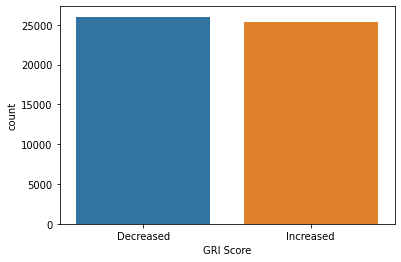

In [ ]:
import seaborn as sns

sns.countplot(x='GRI Score', data=train)

**Data Preprocessing**

In [ ]:
import re

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    sentence = remove_tags(sen)
    
    #remove special tokens Positive and Negative
    sentence = re.sub('Positive:', '', sentence)
    sentence = re.sub('Negative:', '', sentence)
    
    #remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    #single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    #remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    
    return sentence

In [ ]:
x_train = []
sentences = list(train['Review Text'])
for sen in sentences:
    x_train.append(preprocess_text(sen))

In [ ]:
x_train[5]

'My family of four stayed at Somerset Ekamai Bangkok for nights for end of year family trip This is the first time we visited Bangkok and we booked two bedroom apartment for our stay The apartment was spacious and clean and we just feel like home Fridge and washing machine are available for use There were also full set of eating utensils and cooking facilities for simple cooking Staff was friendly and helpful Although the location is little bit away from the city centre the nearest BTS station is at walking distance of within mins There is also Big supermarket and number of restaurants in the area We all had pleasant and relaxing time during our stay at Somerset Ekamai Bangkok '

In [ ]:
x_test = []
sentences2 = list(test['Review Text'])
for sen in sentences2:
    x_test.append(preprocess_text(sen))

In [ ]:
x_test[3]

' If you re looking for somewhere close to the airport this hotel is well situated They have nice reception and guest area upstairs where people can congregate and relax The reception staff were friendly and accommodating There was clip from bandage next to the room door which looked to have been there for while judging by the surrounding dust There were some minor issues in the room with holes in the carpet '

In [ ]:
import numpy as np

y_train = train['GRI Score']
y_train = np.array(list(map(lambda x: 1 if x=='Increased' else 0, y_train)))

In [ ]:
y_test = test['GRI Score']
y_test = np.array(list(map(lambda x: 1 if x=='Increased' else 0, y_test)))

**BERT Tokenizer**

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
#bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
def tokenize_reviews(text_reviews):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [ ]:
tokenized_reviews = [tokenize_reviews(review) for review in x_train]

In [ ]:
 max_size = 0 
 for i, review in enumerate(tokenized_reviews):
   if len(review) > max_size:
     max_size = len(review)

print(max_size)

1930


In [ ]:
#reviews_with_len = [[review, y_train[i], len(review)] for i, review in enumerate(tokenized_reviews)]
reviews_with_len = [[[review[cnt] if cnt < len(review) else 0 for cnt in range(max_size)], y_train[i], len(review)] for i, review in enumerate(tokenized_reviews)]

In [ ]:
import random
random.shuffle(reviews_with_len)

In [ ]:
reviews_with_len.sort(key=lambda x:x[2])

In [ ]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]

In [ ]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 1930), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)>)

In [ ]:
import math

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10

batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [ ]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [ ]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 10

In [ ]:
model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [ ]:
if OUTPUT_CLASSES == 2:
    model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [ ]:
#training_results = model.fit(train_data, epochs=NB_EPOCHS)
bert_history = model.fit(train_data, epochs=NB_EPOCHS, validation_data=test_data)

Epoch 1/10
1453/1453 [==============================] - 140s 96ms/step - loss: 0.6937 - accuracy: 0.5104 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 2/10
1453/1453 [==============================] - 139s 96ms/step - loss: 0.6745 - accuracy: 0.5784 - val_loss: 0.6936 - val_accuracy: 0.5060
Epoch 3/10
1453/1453 [==============================] - 139s 96ms/step - loss: 0.5404 - accuracy: 0.7221 - val_loss: 0.6988 - val_accuracy: 0.5083
Epoch 4/10
1453/1453 [==============================] - 139s 96ms/step - loss: 0.3308 - accuracy: 0.8533 - val_loss: 0.7248 - val_accuracy: 0.4996
Epoch 5/10
1453/1453 [==============================] - 139s 96ms/step - loss: 0.2340 - accuracy: 0.9030 - val_loss: 0.7443 - val_accuracy: 0.5012
Epoch 6/10
1453/1453 [==============================] - 138s 95ms/step - loss: 0.1907 - accuracy: 0.9253 - val_loss: 0.7902 - val_accuracy: 0.5064
Epoch 7/10
1453/1453 [==============================] - 138s 95ms/step - loss: 0.1661 - accuracy: 0.9378 - val_loss: 0